In [30]:
import os
from label_data_utilities import *
from rating_data_utilities import *
from timing_data_utilities import *
from data_utilities import *

pd.set_option('display.max_columns', None)

# Experiment data and labels directories
data_dir = os.path.join('..', 'static', 'data')
user_data_dir = os.path.join(data_dir, 'user_dialogues')
labels_dir = os.path.join(data_dir, 'labels')

# Processed data and label data directories
results_dir = 'results'
label_data_dir = 'label_data'

# Paths to label agreement, timing and confidence rating data
agreement_data_dir = os.path.join(results_dir, 'agreement_data')
post_fix_agreement_data_dir = os.path.join(results_dir, 'agreement_data', 'postfix_only')
timing_data_dir = os.path.join(results_dir, 'timing_data')
rating_data_dir = os.path.join(results_dir, 'rating_data')
distr_data_dir = os.path.join(results_dir, 'distribution_data')

# Load the user data and labels
user_data = load_user_data(user_data_dir)
labels = load_labels(labels_dir, user_data)

# List of sets
sets_list = ['set_1', 'set_2', 'set_3', 'set_4', 'set_5']

# Lists of dialogue corpora and groups
dialogue_groups = dict()
dialogue_groups['practice_dialogue'] = ['practice']
dialogue_groups['kvret_dialogues'] = ['test_28', 'test_52', 'test_96', 'test_129', 'test_102']
dialogue_groups['babl_dialogues'] = ['task1_test_290', 'task1_test_428', 'task1_test_555', 'task1_test_564', 'task1_test_894']
dialogue_groups['task-oriented_dialogues'] = dialogue_groups['kvret_dialogues'] + dialogue_groups['babl_dialogues']

dialogue_groups['scose_dialogues'] = ['jason-mammoth', 'jason-clone', 'jason-accident', 'lynne-hunter', 'lynne-tipsy']
dialogue_groups['cabnc_dialogues'] = ['KB7RE015', 'KBKRE03G', 'KDARE00G', 'KE2RE00Y', 'KBERE00G']
dialogue_groups['non-task-oriented_dialogues'] = dialogue_groups['scose_dialogues'] + dialogue_groups['cabnc_dialogues']

dialogue_type_groups = ['task-oriented_dialogues', 'non-task-oriented_dialogues']
dialogue_corpora_groups = ['kvret_dialogues', 'babl_dialogues', 'scose_dialogues', 'cabnc_dialogues']

# Get the user label data
user_label_data = get_user_label_data(os.path.join(agreement_data_dir, 'user_label_data.pkl'), user_data, labels, sets_list, dialogue_groups)
# If user confidence data has already been generated then load, else create it
user_rating_data = get_user_rating_data(os.path.join(rating_data_dir, 'rating_data.pkl'), user_data, sets_list, dialogue_groups)
# If user timing data has already been generated then load, else create it
user_timing_data = get_user_timing_data(os.path.join(timing_data_dir, 'timing_data.pkl'), user_data, sets_list, dialogue_groups)

# Inter-annotator Agreement

## Dialogue Sets

Alpha                          Beta                    
             da        ap   ap type        da        ap   ap type
set 1  0.478730  0.200428  0.346459  0.735833  0.601271  0.671347
set 2  0.324579  0.105461  0.221338  0.665965  0.560688  0.616175
set 3  0.442411  0.113238  0.268344  0.725819  0.583180  0.648784
set 4  0.518896  0.215649  0.361863  0.759626  0.605894  0.680232
set 5  0.585037  0.284086  0.438179  0.789259  0.648916  0.719561
mean   0.469931  0.183772  0.327237  0.735301  0.599990  0.667220

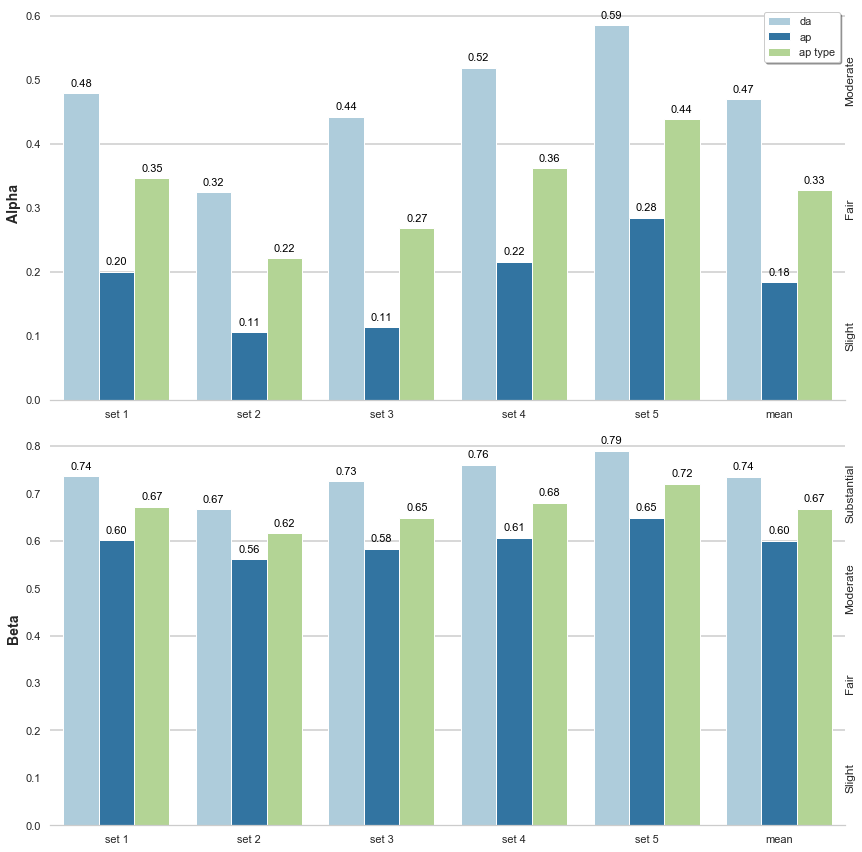

In [31]:
# Generate agreement values for each coefficient/dialogue set
set_frame, set_fig = generate_set_agreement_data(user_label_data['sets_labels'], labels, 'Dialogue Set Agreement', agreement_data_dir, save=False, show=False)
set_frame

### Label Type Stats

In [32]:
# Generate stats for each label type
label_type_frame = generate_label_type_agreement_statistics('Label Type Agreement Statistics', agreement_data_dir, save=False, show=False)
label_type_frame

Alpha                                                               \
    group1   group2 meandiff   p-value   lower   upper reject    eta_sq   
0       ap  ap type   0.1235  0.125300 -0.0263  0.2733  False       NaN   
1       ap       da   0.2462  0.001000  0.0964  0.3960   True       NaN   
2  ap type       da   0.1227  0.128800 -0.0271  0.2724  False       NaN   
3      NaN      NaN      NaN  0.000998     NaN     NaN    NaN  0.215298   

                                                               Beta           \
   omega_sq   cohen_f     n      exp_n     power exp_power   group1   group2   
0       NaN       NaN   NaN        NaN       NaN       NaN       ap  ap type   
1       NaN       NaN   NaN        NaN       NaN       NaN       ap       da   
2       NaN       NaN   NaN        NaN       NaN       NaN  ap type       da   
3  0.185215  0.260651  60.0  40.116816  0.941503       0.8      NaN      NaN   

                                                                          \
  meandiff   p-value   lower   upper reject    eta_sq  omega_sq  cohen_f   
0   0.0572  0.141400 -0.0144  0.1288  False       NaN       NaN      NaN   
1   0.1153  0.001000  0.0438  0.1869   True       NaN       NaN      NaN   
2   0.0581  0.132800 -0.0134  0.1297  False       NaN       NaN      NaN   
3      NaN  0.001262     NaN     NaN    NaN  0.208808  0.178568  0.25072   

                                       
      n      exp_n    power exp_power  
0   NaN        NaN      NaN       NaN  
1   NaN        NaN      NaN       NaN  
2   NaN        NaN      NaN       NaN  
3  60.0  41.575281  0.93258       0.8

## Task-oriented and Non-task-oriented Dialogues

group     Alpha                          Beta  \
                                         da        ap   ap type        da   
test 28             task-oriented  0.802084  0.318182  0.555914  0.896084   
test 52             task-oriented  0.370974  0.178571  0.279948  0.681300   
test 96             task-oriented  0.595147  0.222826  0.410409  0.800023   
test 129            task-oriented  0.830042  0.339806  0.581529  0.913304   
test 102            task-oriented  0.851193  0.611765  0.731258  0.919106   
task1 test 290      task-oriented  0.459638  0.057971  0.270529  0.728098   
task1 test 428      task-oriented  0.604903  0.010989  0.322478  0.794510   
task1 test 555      task-oriented  0.183561  0.012270  0.096574  0.585153   
task1 test 564      task-oriented  0.407588  0.152866  0.281143  0.688921   
task1 test 894      task-oriented  0.457207  0.350000  0.407518  0.711457   
mean                task-oriented  0.556234  0.225525  0.393730  0.771796   
jason-mammoth   non-task-oriented  0.218345  0.143294  0.183132  0.610514   
jason-clone     non-task-oriented  0.056846 -0.018429  0.021640  0.543336   
jason-accident  non-task-oriented  0.387984  0.050086  0.201280  0.709448   
lynne-hunter    non-task-oriented  0.268430 -0.007827  0.122841  0.639293   
lynne-tipsy     non-task-oriented  0.499457  0.201524  0.342842  0.743147   
KB7RE015        non-task-oriented  0.415212  0.109208  0.267018  0.693881   
KBKRE03G        non-task-oriented  0.295027  0.100962  0.200917  0.638889   
KDARE00G        non-task-oriented  0.038109  0.033784  0.035967  0.556463   
KE2RE00Y        non-task-oriented  0.276446  0.290323  0.284226  0.627327   
KBERE00G        non-task-oriented  0.139813  0.076389  0.107812  0.581598   
mean            non-task-oriented  0.259567  0.097931  0.176767  0.634390   
practice                 practice  0.840455  0.367151  0.593472  0.988400   
mean                     practice  0.840455  0.367151  0.593472  0.988400   

                                    
                      ap   ap type  
test 28         0.652893  0.770496  
test 52         0.590909  0.638156  
test 96         0.606061  0.705012  
test 129        0.703704  0.800355  
test 102        0.789474  0.854090  
task1 test 290  0.526042  0.632942  
task1 test 428  0.540146  0.666431  
task1 test 555  0.554264  0.568601  
task1 test 564  0.577778  0.632288  
task1 test 894  0.661458  0.688052  
mean            0.620273  0.695642  
jason-mammoth   0.585153  0.598442  
jason-clone     0.507772  0.526677  
jason-accident  0.565375  0.628516  
lynne-hunter    0.501718  0.566887  
lynne-tipsy     0.612845  0.672838  
KB7RE015        0.536232  0.617337  
KBKRE03G        0.531915  0.587445  
KDARE00G        0.490196  0.525276  
KE2RE00Y        0.680000  0.657820  
KBERE00G        0.541063  0.561358  
mean            0.555227  0.594260  
practice        0.952530  0.969962  
mean            0.952530  0.969962

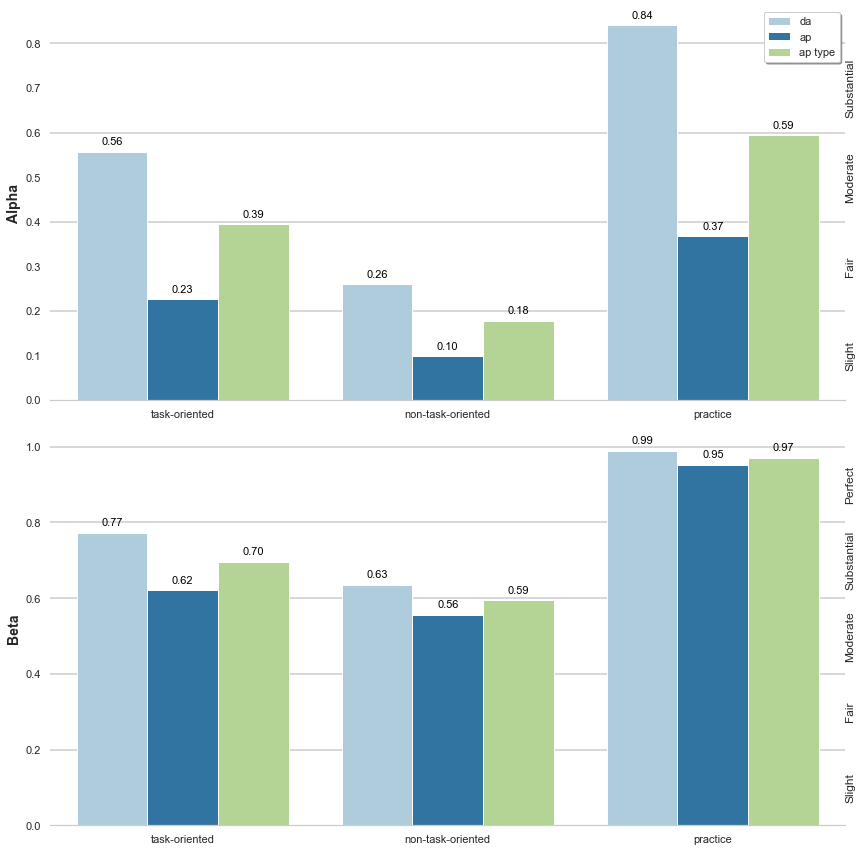

In [33]:
# Generate agreement values for each coefficient/dialogue type
type_frame, type_fig = generate_group_agreement_data(user_label_data, dialogue_type_groups + ['practice_dialogue'], labels, 'Dialogue Type Agreement', agreement_data_dir, save=False, show=False)
type_frame

### Task/non-task Stats

In [34]:
# Generate stats for each coefficient/dialogue type
type_stat_frame, basic_type_stat_frame = generate_dialogue_type_agreement_statistics('Dialogue Type Agreement Statistics', agreement_data_dir, save=False, show=False)
type_stat_frame

Alpha                                                           \
  label_type t-statistic   p-value   cohen-d   n      exp_n     power   
0         da    3.499495  0.002560  1.565022  10   7.502652  0.911098   
1         ap    1.926165  0.070026  0.861407  10  22.157948  0.445705   
2    ap type    3.213741  0.004815  1.437229  10   8.673589  0.859551   
3        all    4.320277  0.000062  1.115491  30  13.645948  0.988924   

                  Beta                                                 \
  exp_power label_type t-statistic   p-value   cohen-d   n      exp_n   
0       0.8         da    3.335372  0.003682  1.491624  10   8.137597   
1       0.8         ap    2.043209  0.055953  0.913751  10  19.808830   
2       0.8    ap type    3.150423  0.005533  1.408912  10   8.977964   
3       0.8        all    4.297046  0.000067  1.109493  30  13.781988   

                       
      power exp_power  
0  0.883550       0.8  
1  0.489622       0.8  
2  0.845809       0.8  
3  0.988241       0.8

## Corpora Agreement

In [ ]:
# Generate agreement values for each coefficient/dialogue corpora
corpora_frame, corpora_fig = generate_group_agreement_data(user_label_data, dialogue_corpora_groups, labels, 'Dialogue Corpora Agreement', agreement_data_dir, save=False, show=False)
corpora_frame

### Corpora Stats

In [ ]:
# Generate stats for each coefficient/dialogue corpora
corpora_stat_frame, basic_corpora_stat_frame = generate_corpora_agreement_statistics('Dialogue Corpora Agreement Statistics', agreement_data_dir, save=False, show=False)
corpora_stat_frame

## AP Label Agreement (postfix-only)

In [ ]:
# Generate agreement values plot for each coefficient/dialogue corpora (post-fix)
post_fix_corpora_fig = generate_postfix_only_plot(agreement_data_dir,  save=False, show=False)

# Generate stats for each coefficient/dialogue type (post-fix)
post_fix_stat_frame, basic_post_fix_stat_frame = generate_dialogue_type_agreement_statistics('Dialogue Type Agreement Statistics', post_fix_agreement_data_dir, save=False, show=False)
post_fix_stat_frame

## Alpha vs Beta

In [ ]:
# Generate user label distribution stats and plots
_, chi_frame, js_frame, bar_plt, dist_fig = generate_user_label_distributions(user_label_data['sets_labels'], sets_list, labels, 'User', distr_data_dir, save=False, show=False)


### Jensen-shannon Divergence

In [ ]:
js_frame

### Chi-squared

In [ ]:
chi_frame

# Annotation Confidence Scores

In [ ]:
_, score_fig = generate_group_rating_data(user_rating_data, dialogue_corpora_groups, 'Dialogue Corpora Confidence Scores', rating_data_dir, save=False, show=False)
score_stats, basic_score_stats = generate_corpora_rating_statistics(user_rating_data, dialogue_corpora_groups, 'Dialogue Corpora Rating Statistics', rating_data_dir, save=False, show=False)
basic_score_stats.round(2)

In [ ]:
score_stats

# Annotation Time

In [ ]:
timing_stats, basic_timing_stats = generate_corpora_timing_statistics(user_timing_data, dialogue_corpora_groups, 'Dialogue Corpora Timing Statistics', timing_data_dir, save=False, show=False)
basic_timing_stats.round(2)

In [ ]:
timing_frame, timing_fig = generate_ordered_time_data(user_timing_data['ordered_times'], 'Ordered Dialogue Times', timing_data_dir, save=False, show=False)
timing_frame = timing_frame[['min', 'max', 'mean', 'std']]
timing_frame.round(2)